In [ ]:

#Q1.What does R-squared represent in a regression model
#R-squared (R²) in a regression model represents how well the independent variable(s) explain the variation in the dependent variable. Basically, it's the "Goodness of Fit" of your model — like how much of the changes in your output (Y) are actually predicted by your input(s) (X).



 # Q2.What are the assumptions of linear regression?
Linear Regression makes these 🔑 assumptions:

Linearity: Relationship between X and Y must be straight-line.
Independence: Residuals (errors) should not be correlated.
Normality: Residuals should follow a normal distribution.
Homoscedasticity: Constant variance of residuals.
No Multicollinearity: Independent variables shouldn't be highly correlated.
# Q3. Difference between R-squared and Adjusted R-squared?
Metric
R-squared
Adjusted R-squared
Meaning
% of variation explained
Penalizes extra features
When to Use
Always
Use for multiple features

#Q4.Why do we use Mean Squared Error (MSE)?
MSE measures the average squared difference between predictions and actual values.

Pros:

Easy to calculate
Smooth (because of squaring)
 Cons:

Sensitive to outliers

#Q5.What does an Adjusted R-squared value of 0.85 indicate?
It means 85% of the variation in the target variable is explained by the model AND it accounts for the number of predictors.

#Q6.How do we check for normality of residuals?
Popular methods:

Histogram 📊
Q-Q Plot
Shapiro-Wilk Test
Kolmogorov-Smirnov Test
Jarque-Bera Test

#Q7.What is multicollinearity, and how does it impact regression?
Multicollinearity = When two or more independent variables are highly correlated

 Why is it bad?

Messes up coefficient estimates
High variance
Hard to interpret model

#Q8.What is Mean Absolute Error (MAE)?
MAE = Average of absolute differences between predictions and actual values.

#Q9.What are the benefits of using an ML pipeline?
Pipelines = Clean + Modular ML code.

Benefits:

Code Reusability
Automated Preprocessing
Easier Hyperparameter Tuning
Reduces Leakage

#Q10.Why is RMSE considered more interpretable than MSE?
RMSE is in the same unit as the target variable — so it's easier to explain.

#Q11.What is pickling in Python, and how is it useful in ML?
Pickling = Saving ML models in binary format (.pkl file).

Example:

python
Copy
Edit
import pickle
with open('model.pkl', 'wb') as f:
  pickle.dump(model, f)

#Q12 What does a high R-squared value mean?
High R² means your model is explaining most of the variation in the dependent variable.

But always check Adjusted R² to avoid flexing on garbage models

#Q14.What happens if linear regression assumptions are violated?
If assumptions are violated:

Biased coefficients
Wrong predictions
Overfitting or underfitting

#Q15.How can we address multicollinearity in regression?
Remove correlated features
Use PCA (Principal Component Analysis)
Ridge or Lasso Regression
Calculate VIF & drop features with high VIF (>10 🚫)

#Q16.How can feature selection improve model performance?
Less is more 🔥.

Feature Selection:

Reduces overfitting
Improves model speed
Better interpretability

#Q17.How is Adjusted R-squared calculated?

Why is MSE sensitive to outliers?
Because squared errors amplify the effect of large deviations.



#Q18.What is the role of homoscedasticity in linear regression?
Homoscedasticity = Constant variance of residuals.

Violation = Heteroscedasticity

 #Q19 What is Root Mean Squared Error (RMSE)?
RMSE = Square root of MSE

#Q20.Why is pickling considered risky?
Pickling can be risky if:

File is tampered (Security Risk ⚠️)
Not backward compatible between Python versions

#Q21.What is heteroscedasticity, and why is it a problem?
Heteroscedasticity = Residuals have non-constant variance.

Problem?

Increases prediction error
Invalidates confidence intervals

#Q22.How can interaction terms enhance a regression model's predictive power?
Interaction terms show how two features combined impact the target variable — something that individual features alone can't capture.


In [ ]:
#Practical
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

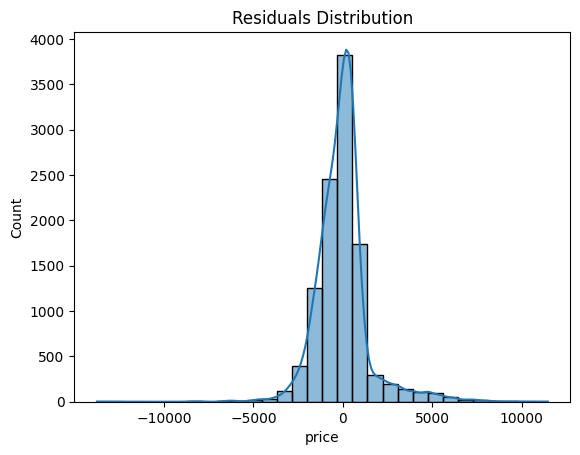

In [ ]:
#1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
#using Seaborn's "diamonds" dataset.
diamonds = sns.load_dataset('diamonds')
X = diamonds[['carat', 'depth', 'table']]  # Select features
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [ ]:
#2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
# Mean Squared Error (RMSE) for a linear regression model.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

MSE: 2333883.1792799835, MAE: 994.736665092202, RMSE: 1527.7052003838908


In [ ]:
#3.Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
#linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.
def check_assumptions(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Linearity Check
    plt.figure(figsize=(10, 5))
    plt.scatter(y, y_pred)
    plt.title("Linearity Check")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # Homoscedasticity Check
    plt.figure(figsize=(10, 5))
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals Plot (Homoscedasticity Check)")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

    # Multicollinearity Check
    corr_matrix = pd.DataFrame(X).corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

In [ ]:
#4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
#performance of different regression models
def evaluate_models(X, y):
    models = [LinearRegression()]
    model_names = ["Linear Regression"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model, name in zip(models, model_names):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        print(f"{name} R-squared: {r2_score(y_test, y_pred):.4f}")


In [ ]:
#5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
#R-squared score.
def simple_linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("R-squared:", model.score(X, y))

In [ ]:
#6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
#simple linear regression and visualizes the results.
def tips_regression():
    tips = sns.load_dataset("tips")
    X = tips[['total_bill']]
    y = tips['tip']
    simple_linear_regression(X, y)
    plt.figure(figsize=(10, 5))
    sns.regplot(x='total_bill', y='tip', data=tips, line_kws={"color": "red"})
    plt.title("Total Bill vs Tip")
    plt.show()

In [ ]:
#7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
#model to predict new values and plot the data points along with the regression line.
def synthetic_one_feature():
    X = np.random.rand(100, 1) * 10
    y = 2.5 * X.squeeze() + np.random.randn(100) * 2
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.scatter(X, y, label="Data Points")
    plt.plot(X, y_pred, color='red', label="Regression Line")
    plt.legend()
    plt.title("Simple Linear Regression on Synthetic Data")
    plt.show()




In [ ]:
#8. Write a Python script that pickles a trained linear regression model and saves it to a file.
def pickle_model():
    X = np.random.rand(100, 1) * 10
    y = 3 * X.squeeze() + 5 + np.random.randn(100) * 2
    model = LinearRegression()
    model.fit(X, y)
    with open("linear_model.pkl", "wb") as file:
        pickle.dump(model, file)
    print("Model saved to linear_model.pkl")

In [ ]:
#9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
#regression curve
def polynomial_regression(X, y):
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    plt.scatter(X, y, label="Data Points")
    plt.plot(np.sort(X.squeeze()), y_pred[np.argsort(X.squeeze())], color='red', label="Regression Curve")
    plt.legend()
    plt.title("Polynomial Regression")
    plt.show()

In [ ]:
#10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
#regression model to the data. Print the model's coefficient and intercept.
def generate_synthetic_data():
    X = np.random.rand(100, 1) * 10
    y = 4.5 * X.squeeze() + np.random.randn(100) * 3
    model = LinearRegression()
    model.fit(X, y)
    print("Coefficient:", model.coef_)
    print("Intercept:", model.intercept_)


In [ ]:
#11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
#compares their performance.
def polynomial_comparison():
    X = np.random.rand(100, 1) * 10
    y = 2 * X.squeeze()**2 + 3 * X.squeeze() + 5 + np.random.randn(100) * 5
    for degree in [1, 2, 3]:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        print(f"Degree {degree} R-squared: {r2_score(y, y_pred):.4f}")




In [ ]:
#12. Write a Python script that fits a simple linear regression model with two features and prints the model's
#coefficients, intercept, and R-squared score.
def linear_regression_two_features():
    X = np.random.rand(100, 2) * 10
    y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100) * 3
    model = LinearRegression()
    model.fit(X, y)
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("R-squared:", model.score(X, y))


In [ ]:
#13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
#regression line along with the data points
# 13. Visualization of Regression Line
def visualize_regression_line():
    X = np.random.rand(100, 1) * 10
    y = 5 * X.squeeze() + np.random.randn(100) * 2
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.scatter(X, y, label="Data Points")
    plt.plot(X, y_pred, color='red', label="Regression Line")
    plt.legend()
    plt.title("Regression Line Visualization")
    plt.show()


In [1]:
# 14. VIF to Check Multicollinearity
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_diabetes

# Load dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

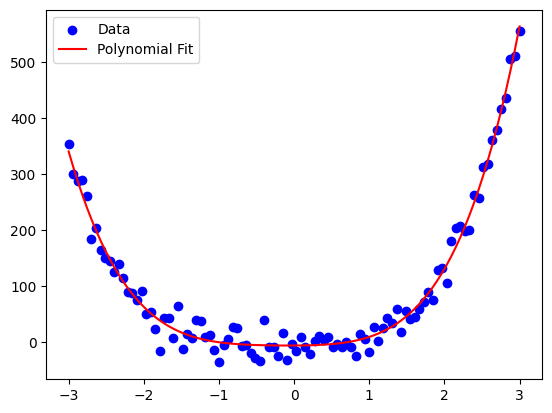

In [2]:
# 15. Polynomial Regression (Degree 4)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 2*x + 3*x**2 + 4*x**3 + 5*x**4 + np.random.randn(100) * 20
X = x[:, np.newaxis]

# Polynomial transformation
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Polynomial Fit')
plt.legend()
plt.show()


In [3]:
# 16. Pipeline with Standardization and Multiple Linear Regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.2, random_state=0)

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
print("R-squared Score:", pipeline.score(X_test, y_test))


R-squared Score: 0.3322332173106186


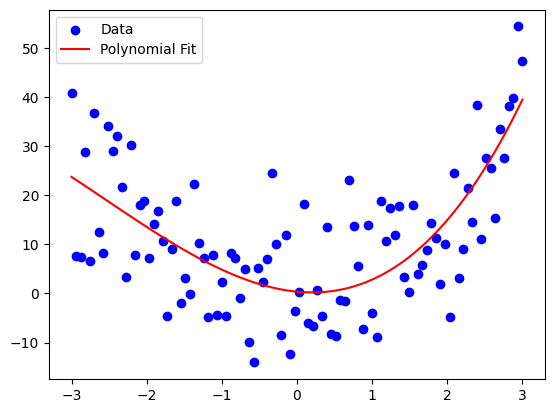

In [4]:
# 17. Polynomial Regression (Degree 3)
x = np.linspace(-3, 3, 100)
y = 1 + 2*x + 3*x**2 + np.random.randn(100) * 10
X = x[:, np.newaxis]
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Polynomial Fit')
plt.legend()
plt.show()

In [5]:
# 18. Multiple Linear Regression with 5 Features
X, y = np.random.rand(100, 5), np.random.rand(100)
model = LinearRegression().fit(X, y)
print("R-squared Score:", model.score(X, y))
print("Coefficients:", model.coef_)

R-squared Score: 0.07761330003243905
Coefficients: [-0.10615967 -0.14611893  0.1783101   0.01139213  0.15790985]


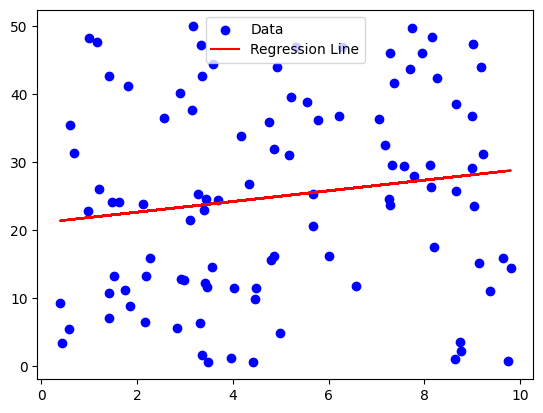

In [6]:
# 19. Linear Regression Visualization
X, y = np.random.rand(100, 1) * 10, np.random.rand(100) * 50
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.legend()
plt.show()



In [7]:
# 20. Multiple Linear Regression with 3 Features
X, y = np.random.rand(100, 3), np.random.rand(100)
model = LinearRegression().fit(X, y)
print("R-squared Score:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared Score: 0.01483438274107729
Coefficients: [ 0.00727723 -0.04234451  0.11000356]


In [8]:
# 21. Serialize and Deserialize using Joblib
import joblib
model = LinearRegression().fit(X, y)
joblib.dump(model, 'model.pkl')
loaded_model = joblib.load('model.pkl')
print("Loaded Model R-squared:", loaded_model.score(X, y))

Loaded Model R-squared: 0.01483438274107729


In [9]:
# 22. Linear Regression with Categorical Features
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

data = sns.load_dataset('tips')
X = data[['total_bill', 'sex', 'smoker']]
y = data['tip']
ct = ColumnTransformer([('encoder', OneHotEncoder(), ['sex', 'smoker'])], remainder='passthrough')
X = ct.fit_transform(X)
model = LinearRegression().fit(X, y)
print("R-squared Score:", model.score(X, y))

R-squared Score: 0.45943317094487623


In [10]:
# 23. Ridge vs Linear Regression
from sklearn.linear_model import Ridge
X, y = np.random.rand(100, 5), np.random.rand(100)
model_lr = LinearRegression().fit(X, y)
model_ridge = Ridge(alpha=1.0).fit(X, y)
print("Linear Regression Coefficients:", model_lr.coef_)
print("Ridge Regression Coefficients:", model_ridge.coef_)
print("Linear R-squared:", model_lr.score(X, y))
print("Ridge R-squared:", model_ridge.score(X, y))

Linear Regression Coefficients: [ 0.16536842 -0.10702443  0.06390568  0.16162614 -0.00434273]
Ridge Regression Coefficients: [ 0.14812867 -0.09439541  0.0645765   0.14089943 -0.00561859]
Linear R-squared: 0.07040423419416475
Ridge R-squared: 0.0696453992527385


In [11]:
# 24. Cross-Validation with Linear Regression
from sklearn.model_selection import cross_val_score
X, y = np.random.rand(100, 3), np.random.rand(100)
scores = cross_val_score(LinearRegression(), X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

Cross-Validation Scores: [-0.12764579 -0.02267663  0.0182043  -0.03508944 -0.08244456]
Mean Score: -0.049930424092945194


In [12]:
# 25. Polynomial Regression Comparison
degrees = [1, 2, 3, 4]
x = np.linspace(-3, 3, 100)
y = 1 + 2*x + 3*x**2 + np.random.randn(100) * 10
X = x[:, np.newaxis]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    print(f"Degree {degree} R-squared: {model.score(X_poly, y)}")


Degree 1 R-squared: 0.06038910451334123
Degree 2 R-squared: 0.40999723198581317
Degree 3 R-squared: 0.4100454601022713
Degree 4 R-squared: 0.4126509081511479


How can interaction terms enhance regression models?
Interaction terms (X1 * X2) capture the combined effect of two features.